In [2]:
# Cell 1: Imports and load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Path to your processed dataset
data_path = "../data/processed/balanced_dataset.csv"

# Load dataset
df = pd.read_csv(data_path)

# Preview
df.head()


,id,title,selftext,label
0,ak3cm1,My mental health is ruining my life,Every morning I wake up in a panic and I cant ...,anxiety
1,d9a53bb3,20 of 365 I'm surprised [Godzilla ](https://yo...,wasn't 2020's final piece of revenge. (Eminem),normal
2,1jae7ux,Poverty has destroyed my life,I live in a homeless shelter. We can't close t...,anxiety
3,1ld2g5g,[25][L] I just need a reminder that I’m not ho...,I feel like I’m reminded every time I let some...,depression
4,1lspl0k,Anxiety has made my life hell,"Ever since I was little, I remember drowning i...",anxiety


In [3]:
# Cell 2: Dataset Overview
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Basic info
df.info()


Shape of dataset: (44775, 4)

Data types:
 id          object
title       object
selftext    object
label       object
dtype: object

Missing values:
 id          0
title       0
selftext    0
label       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44775 entries, 0 to 44774
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        44775 non-null  object
 1   title     44775 non-null  object
 2   selftext  44775 non-null  object
 3   label     44775 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


label
suicidal      11379
anxiety       11327
depression    11057
normal        11012
Name: count, dtype: int64


C:\Users\kengu\AppData\Local\Temp\ipykernel_40804\2138587187.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")


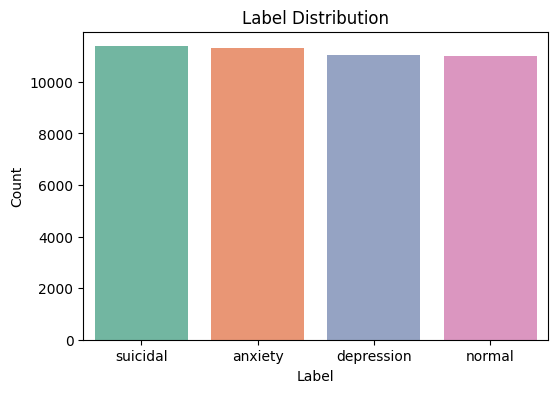

In [4]:
# Cell 3: Label distribution
label_counts = df['label'].value_counts()
print(label_counts)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")
plt.title("Label Distribution")
plt.ylabel("Count")
plt.xlabel("Label")
plt.show()


Title length stats:
 count    44775.000000
mean        10.125003
std          7.464736
min          1.000000
25%          6.000000
50%          7.000000
75%         13.000000
max         68.000000
Name: title_len, dtype: float64

Selftext length stats:
 count    44775.000000
mean       286.410274
std        407.387297
min          1.000000
25%         59.000000
50%        159.000000
75%        356.000000
max       7587.000000
Name: selftext_len, dtype: float64


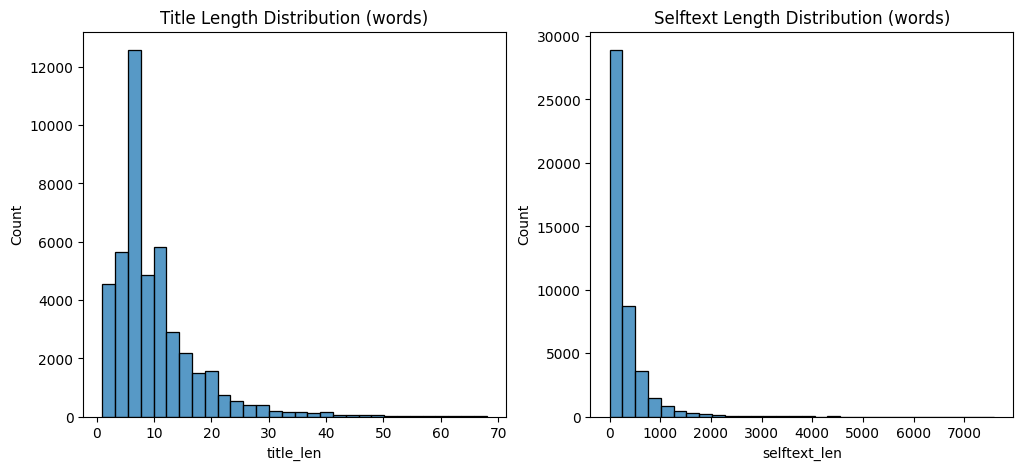

In [5]:
# Cell 4: Text length analysis
# Compute lengths (in words)
df['title_len'] = df['title'].astype(str).apply(lambda x: len(x.split()))
df['selftext_len'] = df['selftext'].astype(str).apply(lambda x: len(x.split()))

print("Title length stats:\n", df['title_len'].describe())
print("\nSelftext length stats:\n", df['selftext_len'].describe())

# Histograms
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df['title_len'], bins=30, kde=False, ax=axes[0])
axes[0].set_title("Title Length Distribution (words)")
sns.histplot(df['selftext_len'], bins=30, kde=False, ax=axes[1])
axes[1].set_title("Selftext Length Distribution (words)")
plt.show()


In [6]:
# Cell 5: Missing / empty texts
empty_title = df['title'].isnull().sum() + (df['title'].astype(str).str.strip() == "").sum()
empty_selftext = df['selftext'].isnull().sum() + (df['selftext'].astype(str).str.strip() == "").sum()

print(f"Empty titles: {empty_title}")
print(f"Empty selftexts: {empty_selftext}")

# Check for "removed" or "deleted" content in selftext
removed_count = df['selftext'].str.lower().isin(['[removed]', '[deleted]']).sum()
print(f"Removed/Deleted selftexts: {removed_count}")


Empty titles: 0
Empty selftexts: 0
Removed/Deleted selftexts: 0


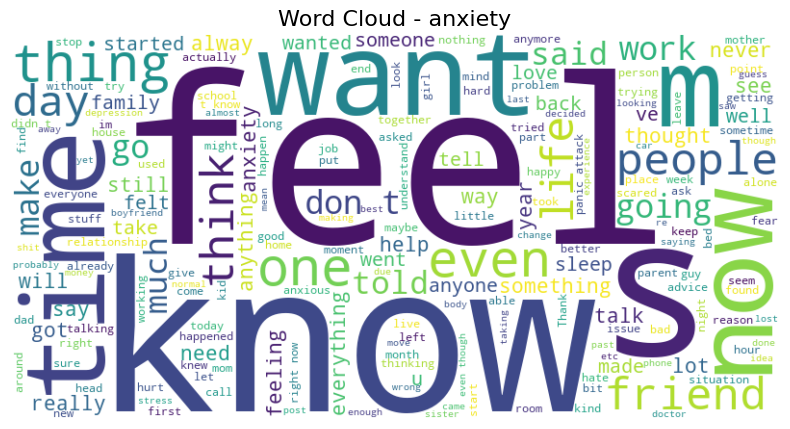

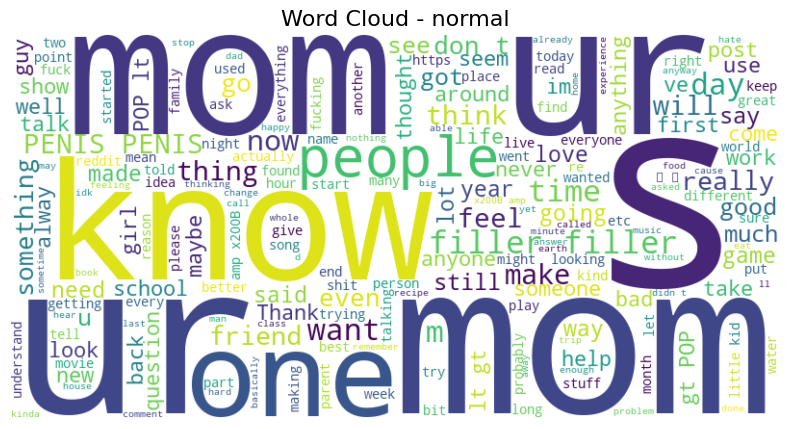

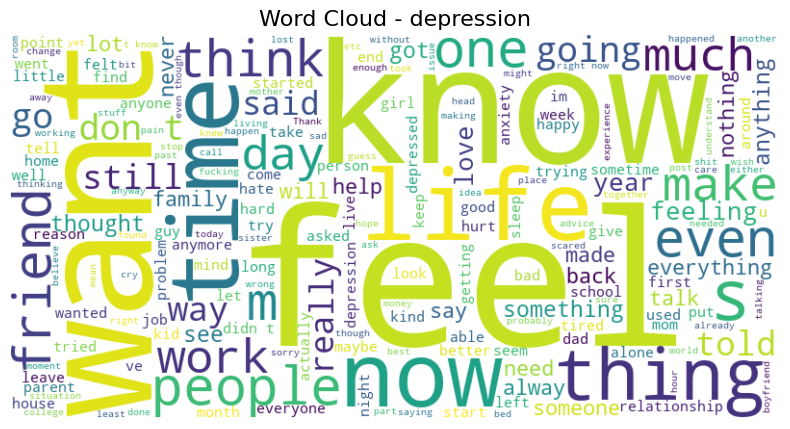

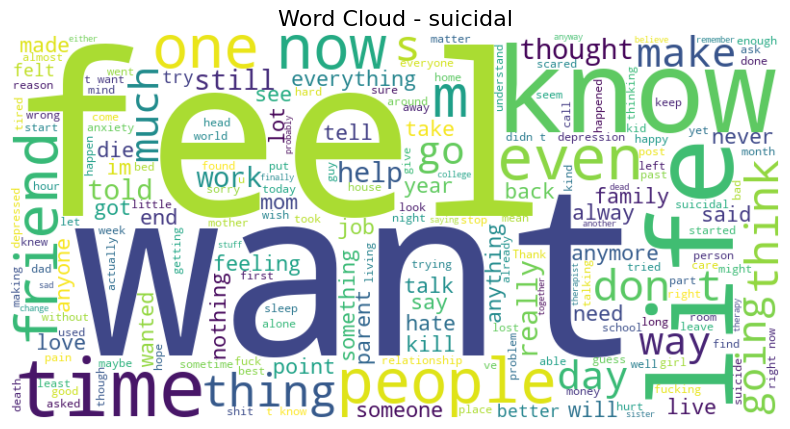

In [9]:
# Cell 7: Word clouds
from wordcloud import WordCloud

for label in df['label'].unique():
    text = " ".join(df[df['label'] == label]['selftext'].dropna().astype(str))
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {label}", fontsize=16)
    plt.show()


C:\Users\kengu\AppData\Local\Temp\ipykernel_40804\4185458172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='selftext_len', data=df, palette="Set3")


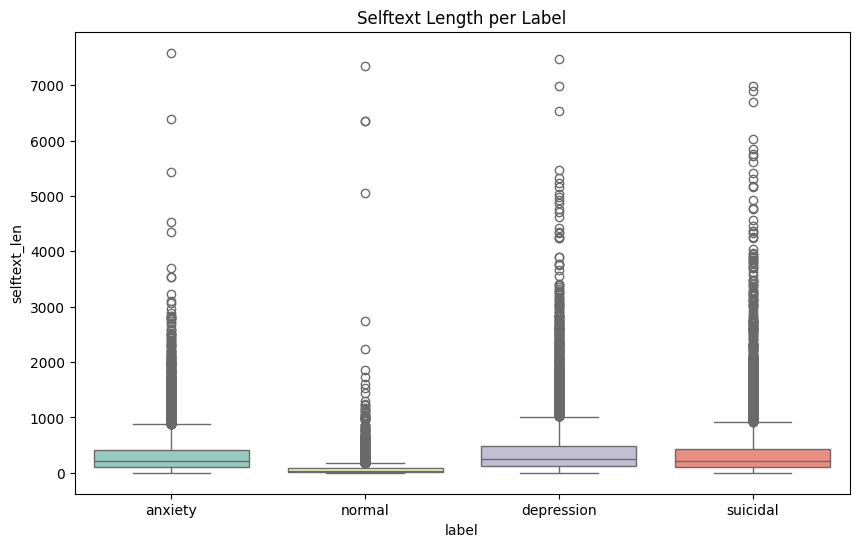

In [10]:
# Cell 8: Label vs Text Length
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='selftext_len', data=df, palette="Set3")
plt.title("Selftext Length per Label")
plt.show()
